In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint


import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import json, os, uuid
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ratingColName = 'customer_sentiment'
df[ratingColName] = 'POSITIVE'
for i in df.index:
    if df['rating'][i] > 3:
      df[ratingColName][i] = 'POSITIVE'
    else:
      df[ratingColName][i] = 'NEGATIVE'
#df = df[df['review_description'].notnull() & df[ratingColName].str.contains('NEGATIVE')]

<ipython-input-78-7c1a3ace555d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'NEGATIVE'
<ipython-input-78-7c1a3ace555d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratingColName][i] = 'POSITIVE'


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.review_description.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['now', 'this', 'is', 'awful', 'because', 'cant', 'make', 'payments', 'with', 'my', 'phone', 'but', 'then', 'every', 'slow', 'open', 'the', 'app', 'get', 'prompted', 'to', 'change', 'settings', 'so', 'that', 'can', 'make', 'payments', 'with', 'my', 'phone', 'and', 'after', 'ive', 'done', 'that', 'it', 'tells', 'me', 'that', 'cant', 'make', 'payments', 'with', 'my', 'phone', 'every', 'slow', 'after', 'that', 'when', 'just', 'want', 'to', 'use', 'the', 'app', 'it', 'holds', 'everything', 'up', 'with', 'prompt', 'that', 'cant', 'make', 'payments', 'with', 'my', 'phone']]


In [ ]:

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('punkt')
import re
wnl = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in nlp.Defaults.stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    i =0
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        #print(doc)
        #texts_out.append([token.lemma_ for token in doc ])
         #[wnl.lemmatize(token.lemma_.lower()) for token in nlp(text) if not token.is_stop and not token.is_punct]
        regex_num_ponctuation = '(\d+)|([^\w\s])'
        regex_little_words = r'(\b\w{1,2}\b)'
        texts_out_temp = [token.lemma_ for token in doc if  not token.is_punct ]
        texts_out.append([wnl.lemmatize(t) for t in word_tokenize(' '.join(texts_out_temp)) 
              if not re.search(regex_num_ponctuation, t) and not re.search(regex_little_words, t)  ])
        print(texts_out[i])
        i = i+1
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in nlp.Defaults.stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

Streaming output truncated to the last 5000 lines.
['fast', 'safe', 'reliable']
['efficient', 'secure']
['excellent', 'xxx']
[]
[]
['quick', 'simple']
['insurmountable', 'issue', 'far', 'difficulty', 'pay', 'cheque', 'android', 'fail', 'successful', 'ipad']
['account', 'credicard', 'statement', 'available', 'single', 'transaction', 'display', 'payment', 'amount', 'customer', 'service', 'call', 'multiple', 'slows', 'absentia', 'help', 'fix', 'month', 'open', 'account', 'worth', 'will', 'not', 'actually', 'online', 'support']
['well', 'well']
['eye', 'account', 'minimum', 'slow']
['excellent', 'service', 'keep', 'control', 'account']
['totally', 'useless', 'pay', 'cheque', 'cheque', 'flat', 'light', 'photo', 'cheque', 'come', 'weird', 'angle', 'see', 'like', 'not', 'understand', 'eventually', 'take', 'decent', 'photo', 'tell', 'picture', 'not', 'spend', 'half', 'hour', 'take', 'retake', 'photo', 'acceptable', 'useful', 'not', 'middle', 'pandemic']
['fast']
['find', 'help', 'people', 'bad

In [ ]:
len(data_ready)
df['cleaned_data']=data_ready
df['cleaned_data']=df['cleaned_data'].apply(lambda x: ' '.join(x))
def saveFileToDrive(path,dataframe):

  with open(path, 'w', encoding = 'utf-8-sig') as f:
    dataframe.to_csv(f)
    print("Saving file : "+path)
saveFileToDrive("/content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv",df)

Saving file : /content/drive/MyDrive/BarclaysReviews/data/final_merged_reviews_cleaned.csv


In [ ]:
pd.set_option('display.max_colwidth', -1)
df[df['source'].str.contains('Google Play') ].shape

<ipython-input-84-658365021a87>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


(30671, 19)

In [ ]:
df[df["review_description"].str.contains("amazon")][["review_description", "rating","cleaned_data"]].shape

(11, 3)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

def generateWordCloud(df,columns ={},textcol = "cleaned_data"):
  print(columns)
  if bool(columns):
    # print("columns")
    for key in columns:
      # print(df.shape)
      df = df[df[key].str.contains(columns[key])]
  print(df.shape)
  text2 = " ".join(title for title in df[textcol])

  # Creating word_cloud with text as argument in .generate() method

  word_cloud2 = WordCloud(collocations = False, background_color = 'white',max_font_size=100, max_words=100).generate(text2)

  # Display the generated Word Cloud

  plt.imshow(word_cloud2, interpolation='bilinear')

  plt.axis("off")

  plt.show()

{}
(32671, 19)


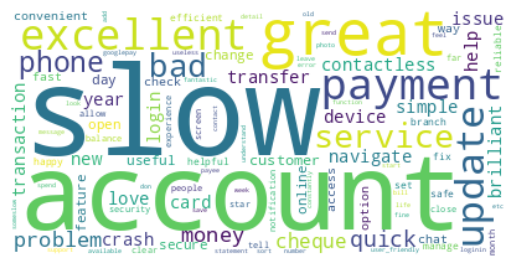

In [ ]:
generateWordCloud(df)

{'customer_sentiment': 'NEGATIVE'}
(6267, 19)


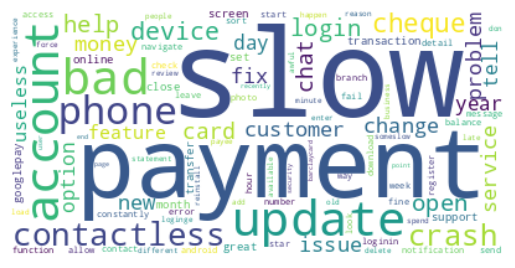

In [ ]:
generateWordCloud(df,columns ={"customer_sentiment":"NEGATIVE"})

{'customer_sentiment': 'POSITIVE'}
(26404, 19)


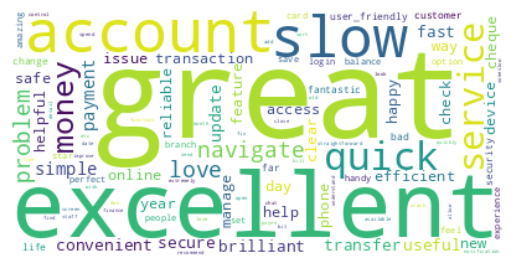

In [ ]:
generateWordCloud(df,columns ={"customer_sentiment":"POSITIVE"})

{'source': 'Google Play'}
(30671, 19)


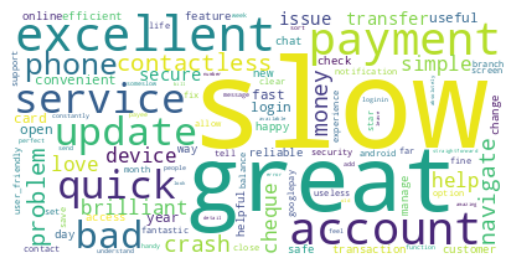

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play"})

{'source': 'Google Play', 'customer_sentiment': 'POSITIVE'}
(25086, 19)


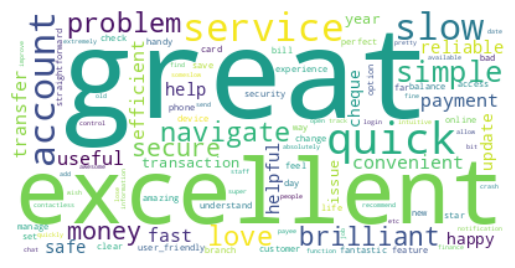

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play","customer_sentiment":"POSITIVE"})

{'source': 'Google Play', 'customer_sentiment': 'NEGATIVE'}
(5585, 19)


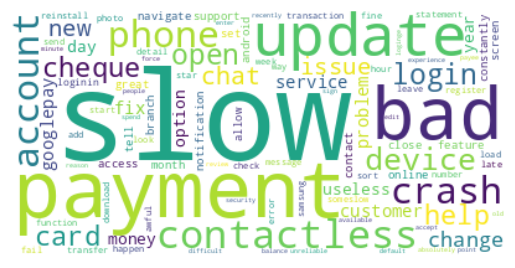

In [ ]:
generateWordCloud(df,columns ={"source":"Google Play","customer_sentiment":"NEGATIVE"})

{'source': 'App Store'}
(2000, 19)


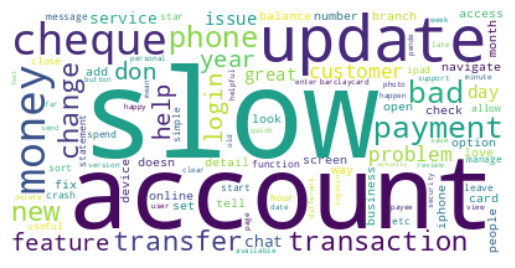

In [ ]:
generateWordCloud(df,columns ={"source":"App Store"})

{'source': 'App Store', 'customer_sentiment': 'POSITIVE'}
(1318, 19)


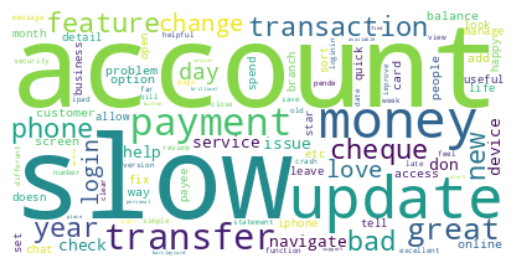

In [ ]:
generateWordCloud(df,columns ={"source":"App Store","customer_sentiment":"POSITIVE"})

{'source': 'App Store', 'customer_sentiment': 'NEGATIVE'}
(682, 19)


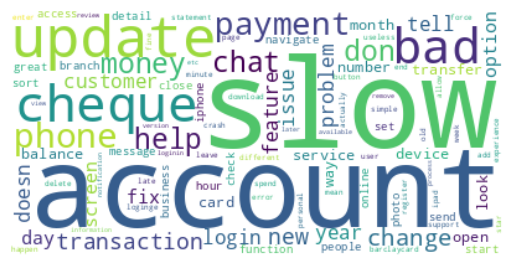

In [ ]:
generateWordCloud(df,columns ={"source":"App Store","customer_sentiment":"NEGATIVE"})